In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

from hmmlearn import hmm

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Example data and code
https://medium.com/@natsunoyuki/hidden-markov-models-with-python-c026f778dfa7

https://anaconda.org/conda-forge/hmmlearn

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0014753

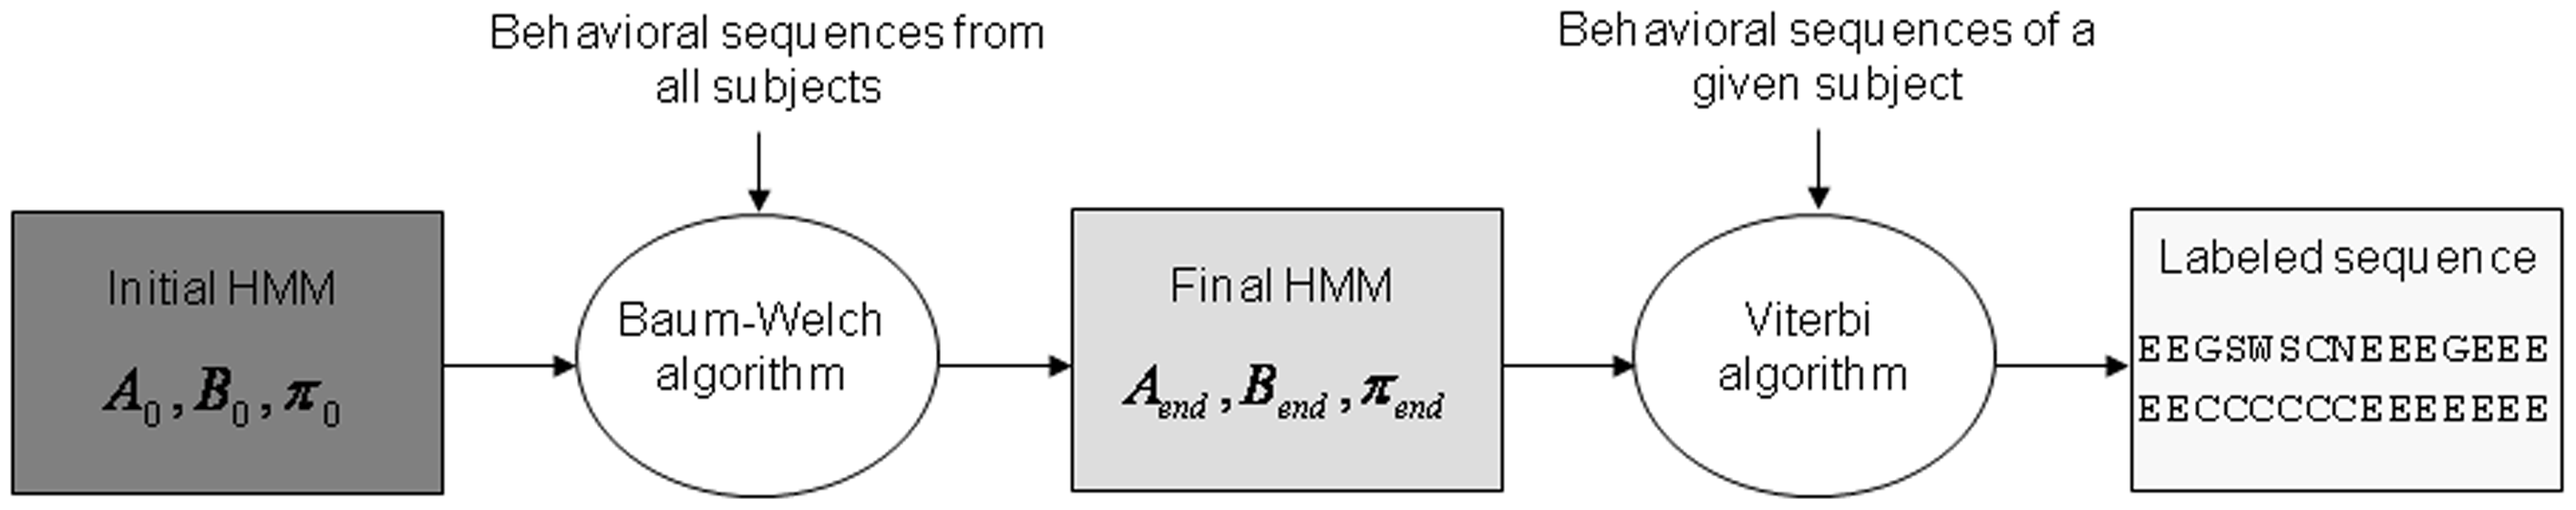

from https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0014753

In [2]:
base_dir = "https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"

example_data = pd.read_csv(base_dir)

# Convert the datetime from str to datetime object.
example_data["datetime"] = pd.to_datetime(example_data["datetime"])

# Determine the daily change in gold price.
example_data["gold_price_change"] = example_data["gold_price_usd"].diff()

# Restrict the data to later than 2008 Jan 01.
example_data = example_data[example_data["datetime"] >= pd.to_datetime("2008-01-01")]

# Use the daily change in gold price as the observed measurements X.
X = example_data[["gold_price_change"]].values
[]
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

### Get drinking data

In [3]:
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/polysubstance_drink3s_221019.csv'
    
data = pd.read_csv(path)
data = pd.DataFrame(data = data)
print(data.shape)
data.head()

(65191, 51)


,Unnamed: 0,Unnamed: 0.1,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance,value_wt
0,0,0,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,2,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58671,16,977,58611,EtOH05,0.707071
1,1,1,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,3,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58674,16,977,58614,EtOH05,0.707071
2,2,2,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,4,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58677,16,977,58617,EtOH05,0.707071
3,3,3,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,5,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:59,drink_1,0.021,2022-10-10 16:17:59,1.665419e+09,2022-10-10,10,16:17:59,16,17,59,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58679,16,977,58619,EtOH05,0.707071
4,4,4,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,15,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 17:28:38,drink_1,0.021,2022-10-10 17:28:38,1.665423e+09,2022-10-10,10,17:28:38,17,28,38,light,VDM_EtOH05,1.0,19.446,041AC165FE,etoh_05,2022-10-10 17:28:30.700963200,2022-10-10 17:28:50.146963200,light,1,0.0,same,1,1048,62918,17,1048,62858,EtOH05,0.707071


In [4]:
len(data['IdRFID'].unique())

69

In [5]:
### convert substance to numerical

sub_to_num = {'water': 0,
              'Fent05': 1,
              'Fent20': 2,
              'EtOH05': 3,
              'EtOH10': 4,
             }

data['sub_num'] = data['substance'].map(sub_to_num)

data.head()

,Unnamed: 0,Unnamed: 0.1,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance,value_wt,sub_num
0,0,0,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,2,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58671,16,977,58611,EtOH05,0.707071,3
1,1,1,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,3,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58674,16,977,58614,EtOH05,0.707071,3
2,2,2,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,4,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58677,16,977,58617,EtOH05,0.707071,3
3,3,3,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,5,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:59,drink_1,0.021,2022-10-10 16:17:59,1.665419e+09,2022-10-10,10,16:17:59,16,17,59,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58679,16,977,58619,EtOH05,0.707071,3
4,4,4,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,15,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 17:28:38,drink_1,0.021,2022-10-10 17:28:38,1.665423e+09,2022-10-10,10,17:28:38,17,28,38,light,VDM_EtOH05,1.0,19.446,041AC165FE,etoh_05,2022-10-10 17:28:30.700963200,2022-10-10 17:28:50.146963200,light,1,0.0,same,1,1048,62918,17,1048,62858,EtOH05,0.707071,3


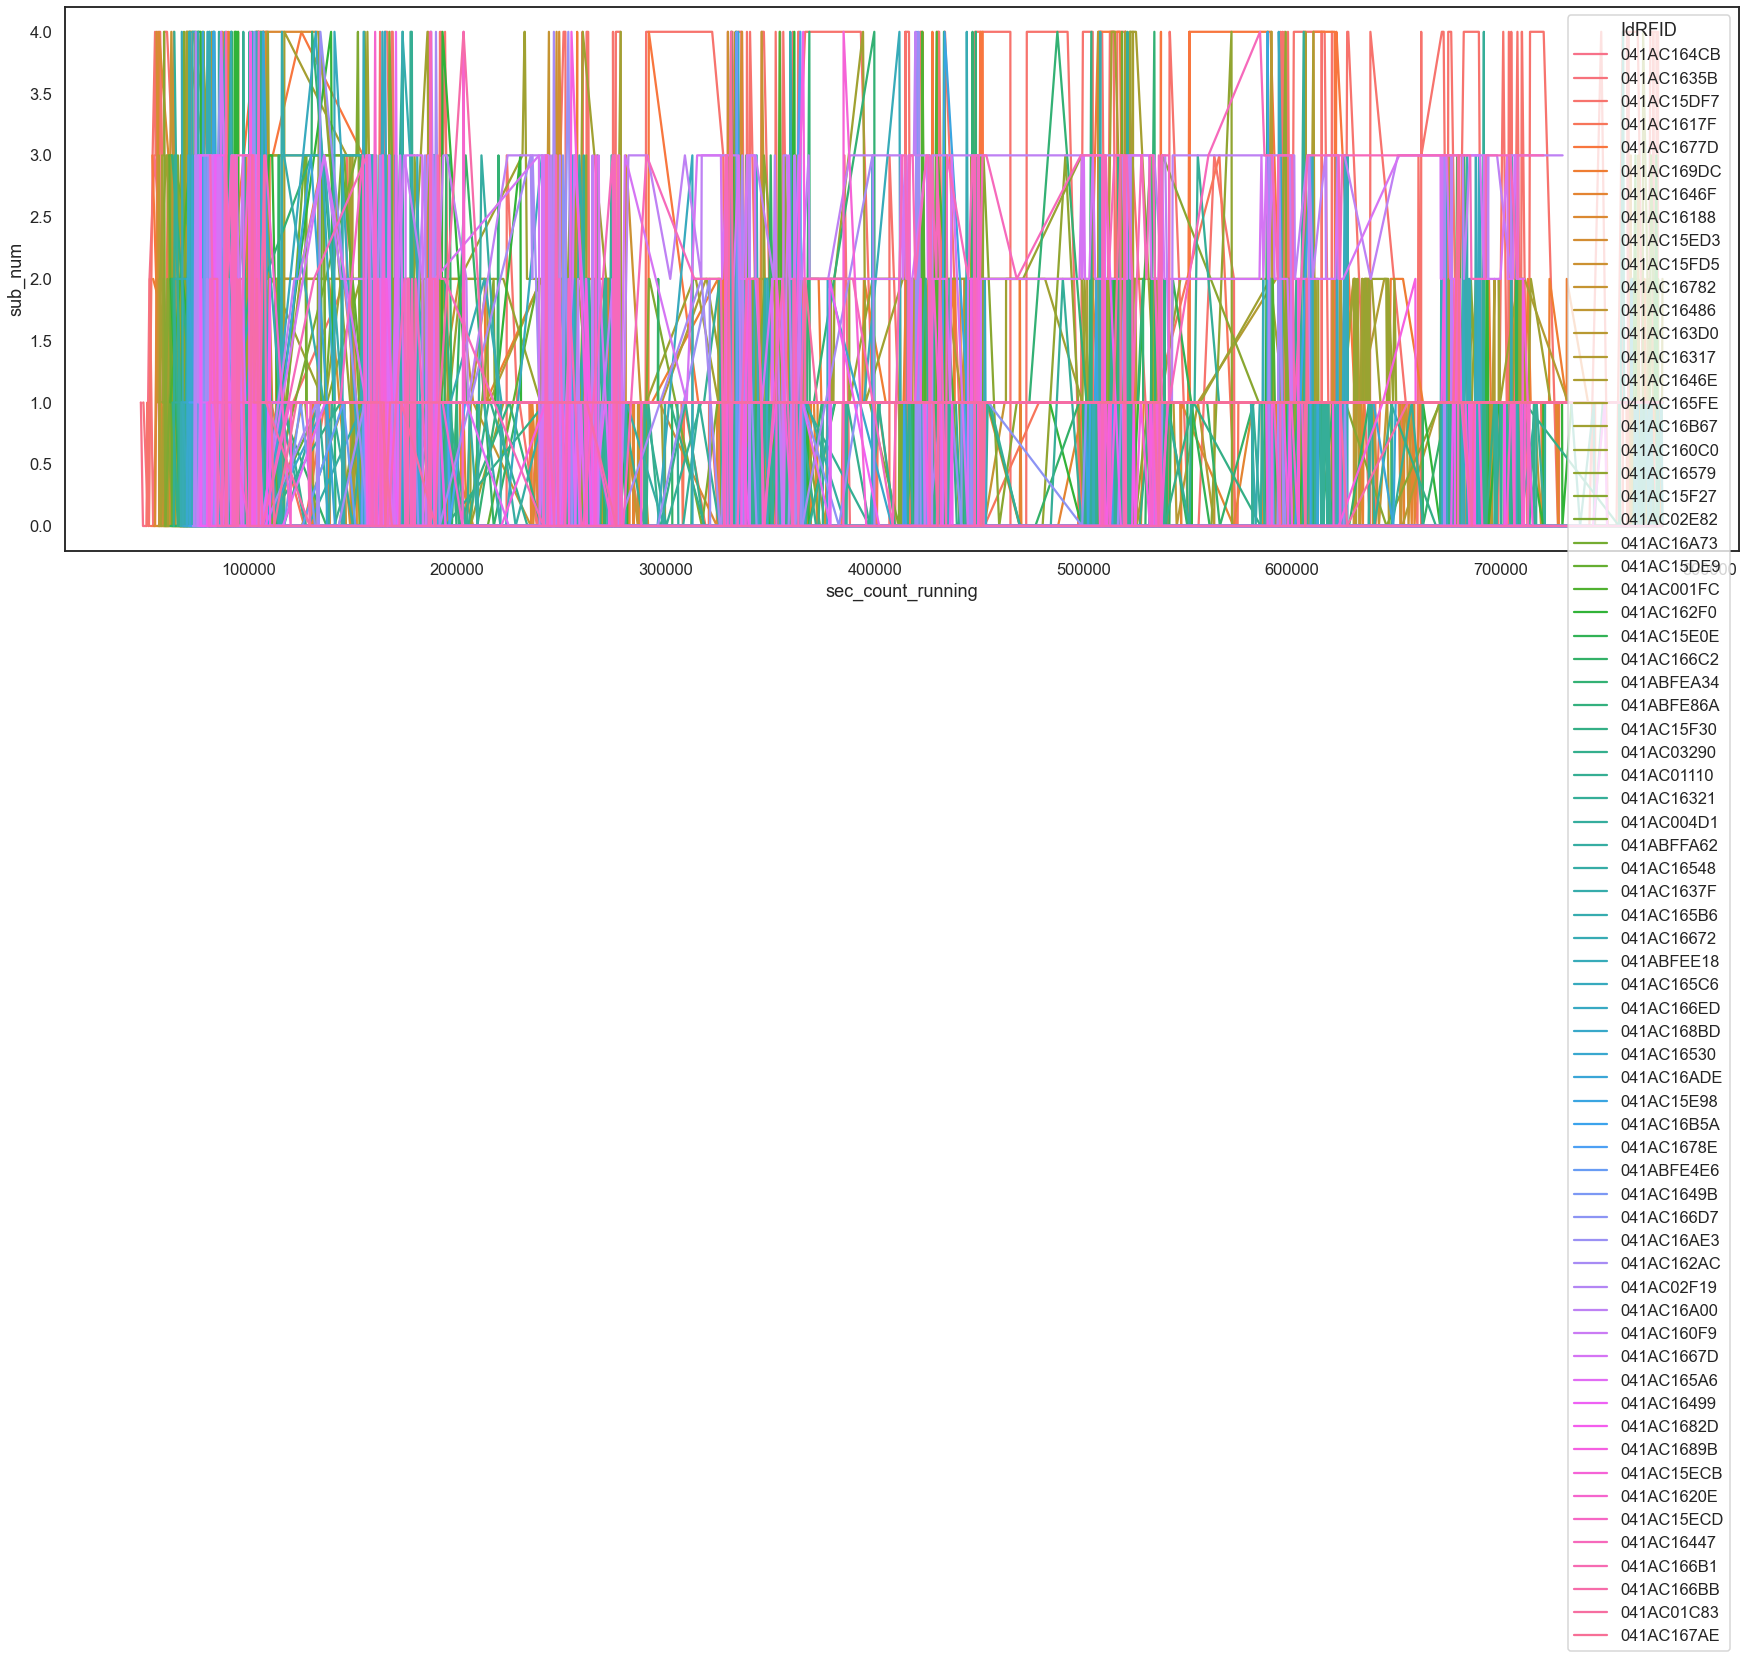

In [6]:
data=data.sort_values('sec_count_running')

plt.figure(figsize=(30, 10))
sns.lineplot(x='sec_count_running', y='sub_num', data=data, hue='IdRFID')
plt.show()

### Use most active drinking mouse to start

In [ ]:
data.groupby(['IdRFID'])['substance'].value_counts()

In [ ]:
#use mouse with most activity
d = data[data['IdRFID']=='041AC164CB']

d['substance'].value_counts()

In [ ]:
X = d.sort_values('sec_count_running')[['sub_num']].values

# Build the HMM model and fit 
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 99, random_state = 39)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

In [ ]:
print("Unique states:")
print(states)

print("\nStart probabilities:")
print(model.startprob_)

print("\nTransition matrix:")
print(model.transmat_)

print("\nGaussian distribution means:")
print(model.means_)

print("\nGaussian distribution covariances:")
print(model.covars_)

fig, ax = plt.subplots()
ax.imshow(model.transmat_, aspect='auto', cmap='spring')

### Multiple mice

In [ ]:
d1 = data[data['IdRFID']=='041AC164CB']
d2 = data[data['IdRFID']=='041ABFFA62']
d3 = data[data['IdRFID']=='041AC160C0']
d4 = data[data['IdRFID']=='041AC16B67']

d = pd.concat([d1, d2, d3, d4])
d.columns = data.columns

X1 = d1.sort_values('sec_count_running')[['sub_num']].values
X2 = d2.sort_values('sec_count_running')[['sub_num']].values
X3 = d3.sort_values('sec_count_running')[['sub_num']].values
X4 = d4.sort_values('sec_count_running')[['sub_num']].values

X = np.concatenate([X1, X2, X3, X4])
lengths = [len(X1), len(X2), len(X3), len(X4)]

#### Pick number of hidden states

In [ ]:
# Build the HMM model and fit 
model = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 99, random_state = 39)

model.fit(X, lengths)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

print(model.monitor_.converged)

In [ ]:
print("Unique states:")
print(states)

print("\nStart probabilities:")
print(model.startprob_)

print("\nTransition matrix:")
print(model.transmat_)

print("\nGaussian distribution means:")
print(model.means_)

print("\nGaussian distribution covariances:")
print(model.covars_)

fig, ax = plt.subplots()
ax.imshow(model.transmat_, aspect='auto', cmap='spring')

In [ ]:
plt.figure(figsize=(20, 10))

for i in states:
    want = (Z == i)
    x = d["sec_count_running"].iloc[want]
    y = d["sub_num"].iloc[want]
    plt.plot(x, y, '.')

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='sec_count_running', y='sub_num', data=d, hue='IdRFID')
plt.show()

#### Determine best n of hidden states

In [ ]:
scores = list()
models = list()
for n_components in range(1, 5):
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.GaussianHMM(n_components=n_components, random_state=idx,
                               n_iter=10)
        model.fit(X, lengths)
        models.append(model)
        scores.append(model.score(X))
        print(f'Converged: {model.monitor_.converged}\t\t'
              f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

In [ ]:
# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(X)
states_unique = pd.unique(states)

print("Model converge:")
print(model.monitor_.converged)

print("\nUnique states:")
print(states_unique)

print("\nStart probabilities:")
print(model.startprob_)

print("\nTransition matrix:")
print(model.transmat_)

print("\nGaussian distribution means:")
print(model.means_)

print("\nGaussian distribution covariances:")
print(model.covars_)

In [ ]:
fig, ax = plt.subplots()
ax.imshow(model.transmat_, aspect='auto', cmap='spring')
ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')

In [ ]:
plt.figure(figsize=(20, 10))

for i in states_unique:
    want = (states == i)
    x = d["sec_count_running"].iloc[want]
    y = d["sub_num"].iloc[want]
    plt.plot(x, y, '.')
    plt.xlabel('sec_count_running')
    plt.ylabel('sub_num')
    plt.legend(states_unique)
    plt.title('Hidden state vs. state')
    

In [ ]:
rolls, gen_states = model.sample(30000)

In [ ]:
# plot states over time, let's just look at the first rolls for clarity
fig, ax = plt.subplots()
ax.plot(gen_states[:500])
ax.set_title('States over time')
ax.set_xlabel('Time (# of rolls)')
ax.set_ylabel('State')
fig.show()

# plot rolls for the fair and loaded states
fig, ax = plt.subplots()
ax.hist(rolls[gen_states == 0], label='water', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)
ax.hist(rolls[gen_states == 1], label='fent05', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)
ax.hist(rolls[gen_states == 2], label='fent20', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)
ax.hist(rolls[gen_states == 3], label='etoh', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)


ax.set_title('Transition probabilities by state')
ax.set_xlabel('State')
ax.set_ylabel('Transition Prob')
ax.legend()
fig.show()

### All mice

In [7]:
data_concat = []
data_length = []

for IdRFID in data['IdRFID'].unique():
    d_int = data[data['IdRFID']==IdRFID].sort_values('sec_count_running')
    data_concat.extend(d_int[['sub_num']].values)
    data_length.append(d_int.shape[0])

In [8]:
scores = list()
models = list()
for n_components in range(1, 9):
    for idx in range(9):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.GaussianHMM(n_components=n_components, random_state=idx,
                               n_iter=9)
        model.fit(data_concat, data_length)
        models.append(model)
        scores.append(model.score(data_concat, data_length))
        print(f'Converged: {model.monitor_.converged}\t\t'
              f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

Converged: True		Score: -77931.4880916189
Converged: True		Score: -77931.4880916189
Converged: True		Score: -77931.4880916189
Converged: True		Score: -77931.4880916189
Converged: True		Score: -77931.4880916189
Converged: True		Score: -77931.4880916189
Converged: True		Score: -77931.4880916189
Converged: True		Score: -77931.4880916189
Converged: True		Score: -77931.4880916189
Converged: True		Score: 140319.63139780328
Converged: True		Score: 140319.63139780087
Converged: True		Score: 140319.63139780328
Converged: True		Score: 140319.6313978033
Converged: True		Score: 140319.63139780087
Converged: True		Score: 140319.6313977998
Converged: True		Score: 140319.63139780328
Converged: True		Score: 140319.6313978033
Converged: True		Score: 140319.6313978033
Converged: True		Score: 362656.7941075635
Converged: True		Score: 362656.7941020845
Converged: True		Score: 362656.7941020837
Converged: True		Score: 362656.79410756734
Converged: True		Score: 362656.79410756734
Converged: True		Score: 362

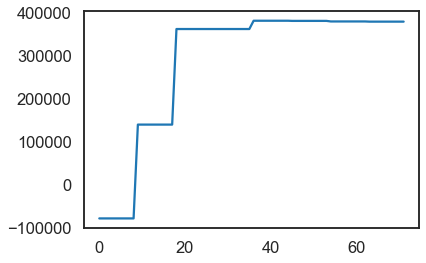

In [9]:
plt.plot(scores)

In [10]:
# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
model = hmm.GaussianHMM(n_components=3, random_state=39,
                               n_iter=39)

model.fit(data_concat, data_length)

states = model.predict(data_concat)
states_unique = pd.unique(states)

print("Model converge:")
print(model.monitor_.converged)

print("\nUnique states:")
print(states_unique)

print("\nStart probabilities:")
print(model.startprob_)

print("\nTransition matrix:")
print(model.transmat_)

print("\nGaussian distribution means:")
print(model.means_)

print("\nGaussian distribution covariances:")
print(model.covars_)

Model converge:
True

Unique states:
[1 0 2]

Start probabilities:
[0.40579687 0.27527924 0.31892389]

Transition matrix:
[[0.94814562 0.03505266 0.01680173]
 [0.03364833 0.95045143 0.01590024]
 [0.07996535 0.08122241 0.83881225]]

Gaussian distribution means:
[[0.        ]
 [1.        ]
 [2.60563314]]

Gaussian distribution covariances:
[[[0.00000035]]

 [[0.00000033]]

 [[0.43618106]]]


Text(0, 0.5, 'State From')

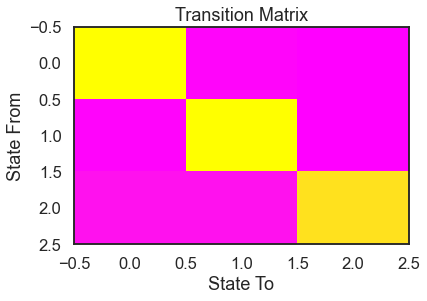

In [11]:
fig, ax = plt.subplots()
ax.imshow(model.transmat_, aspect='auto', cmap='spring')
ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')

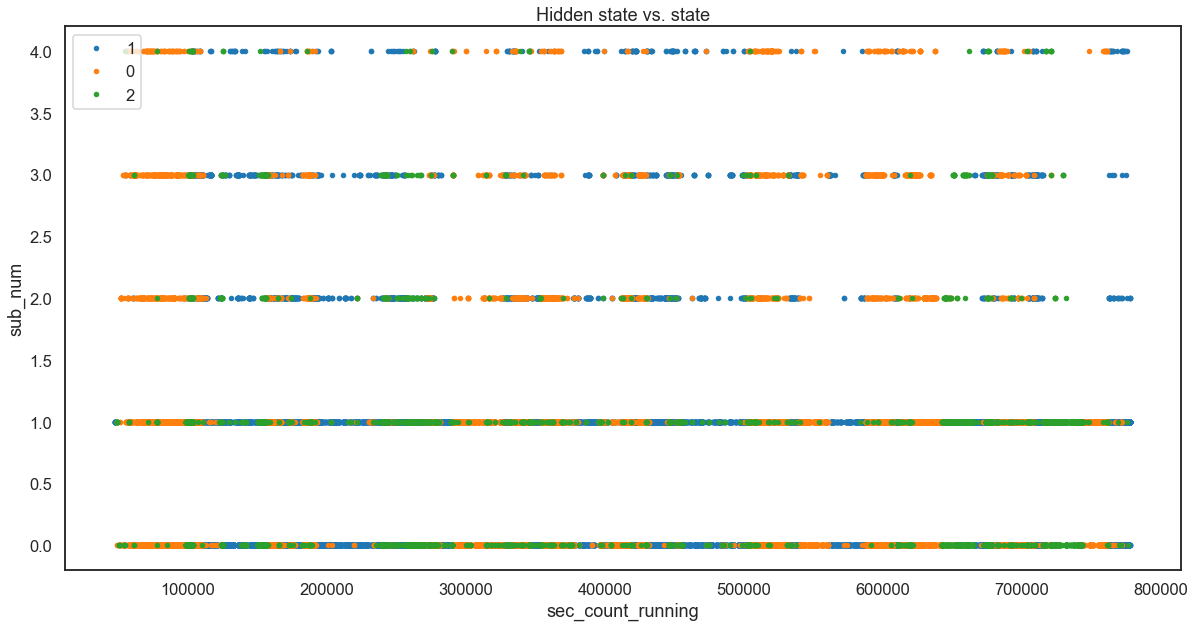

In [12]:
plt.figure(figsize=(20, 10))

for i in states_unique:
    want = (states == i)
    x = data["sec_count_running"].iloc[want]
    y = data["sub_num"].iloc[want]
    plt.plot(x, y, '.')
    plt.xlabel('sec_count_running')
    plt.ylabel('sub_num')
    plt.legend(states_unique)
    plt.title('Hidden state vs. state')
    

### can we recover the pattern

In [ ]:
rolls, gen_states = model.sample(30000)

In [ ]:
# plot states over time, let's just look at the first rolls for clarity
fig, ax = plt.subplots()
ax.plot(gen_states[:500])
ax.set_title('States over time')
ax.set_xlabel('Events')
ax.set_ylabel('State')
fig.show()

# plot rolls for the fair and loaded states
fig, ax = plt.subplots()
ax.hist(rolls[gen_states == 0], label='mixed', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)
ax.hist(rolls[gen_states == 1], label='fent05', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)
ax.hist(rolls[gen_states == 2], label='water', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)


ax.set_title('Transition probabilities by state')
ax.set_xlabel('State')
ax.set_ylabel('Transition Prob')
ax.legend()
fig.show()

### Create new df with predictions of hidden state and animal meta data

In [14]:
model

GaussianHMM(n_components=3, n_iter=39, random_state=39)

In [35]:
pred_dict = {}

for IdRFID in data['IdRFID'].unique():
    X = data[data['IdRFID']==IdRFID].sort_values('sec_count_running')[['sub_num']].values
    states = model.predict(X)
    data.loc[data['IdRFID']==IdRFID, 'state_pred'] = states
    pred_dict[IdRFID] = states

In [48]:
data['Housing'] = ['single' if x==1 else 'group' for x in data['Cage_N']]
data.head()

,Unnamed: 0,Unnamed: 0.1,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance,value_wt,sub_num,state_pred,Housing
29540,46357,46357,poly,six_four,22.09.29,na,3,041AC164CB,2110.0,642.0,na,male,3,32.5,NaN,NaN,NaN,5471,w_e10_f20_w_e5_f5_mf_220929.csv,6,09/29/22 13:27:27,drink_2,0.021,2022-09-29 13:27:27,1.664458e+09,2022-09-29,29,13:27:27,13,27,27,light,VDM_Fent05,3.0,40.812,041AC164CB,fent_05,2022-09-29 13:27:20.506032000,2022-09-29 13:28:01.318032000,light,1.0,0.0,same,1,807,48447,13,807,48387,Fent05,0.646154,1,1.0,group
29541,46358,46358,poly,six_four,22.09.29,na,3,041AC164CB,2110.0,642.0,na,male,3,32.5,NaN,NaN,NaN,5472,w_e10_f20_w_e5_f5_mf_220929.csv,6,09/29/22 13:27:30,drink_2,0.021,2022-09-29 13:27:30,1.664458e+09,2022-09-29,29,13:27:30,13,27,30,light,VDM_Fent05,3.0,40.812,041AC164CB,fent_05,2022-09-29 13:27:20.506032000,2022-09-29 13:28:01.318032000,light,1.0,0.0,same,1,807,48450,13,807,48390,Fent05,0.646154,1,1.0,group
29542,46359,46359,poly,six_four,22.09.29,na,3,041AC164CB,2110.0,642.0,na,male,3,32.5,NaN,NaN,NaN,5473,w_e10_f20_w_e5_f5_mf_220929.csv,6,09/29/22 13:27:32,drink_2,0.021,2022-09-29 13:27:32,1.664458e+09,2022-09-29,29,13:27:32,13,27,32,light,VDM_Fent05,3.0,40.812,041AC164CB,fent_05,2022-09-29 13:27:20.506032000,2022-09-29 13:28:01.318032000,light,1.0,0.0,same,1,807,48452,13,807,48392,Fent05,0.646154,1,1.0,group
29543,46360,46360,poly,six_four,22.09.29,na,3,041AC164CB,2110.0,642.0,na,male,3,32.5,NaN,NaN,NaN,5474,w_e10_f20_w_e5_f5_mf_220929.csv,6,09/29/22 13:27:35,drink_2,0.021,2022-09-29 13:27:35,1.664458e+09,2022-09-29,29,13:27:35,13,27,35,light,VDM_Fent05,3.0,40.812,041AC164CB,fent_05,2022-09-29 13:27:20.506032000,2022-09-29 13:28:01.318032000,light,1.0,0.0,same,1,807,48455,13,807,48395,Fent05,0.646154,1,1.0,group
29544,46361,46361,poly,six_four,22.09.29,na,3,041AC164CB,2110.0,642.0,na,male,3,32.5,NaN,NaN,NaN,5475,w_e10_f20_w_e5_f5_mf_220929.csv,6,09/29/22 13:27:43,drink_2,0.021,2022-09-29 13:27:43,1.664458e+09,2022-09-29,29,13:27:43,13,27,43,light,VDM_Fent05,3.0,40.812,041AC164CB,fent_05,2022-09-29 13:27:20.506032000,2022-09-29 13:28:01.318032000,light,1.0,0.0,same,1,807,48463,13,807,48403,Fent05,0.646154,1,1.0,group


<AxesSubplot:xlabel='substance', ylabel='state_pred'>

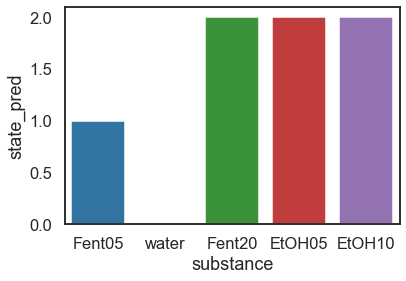

In [37]:
sns.barplot(x='substance', y='state_pred', data=data)

<AxesSubplot:xlabel='min_count', ylabel='state_pred'>

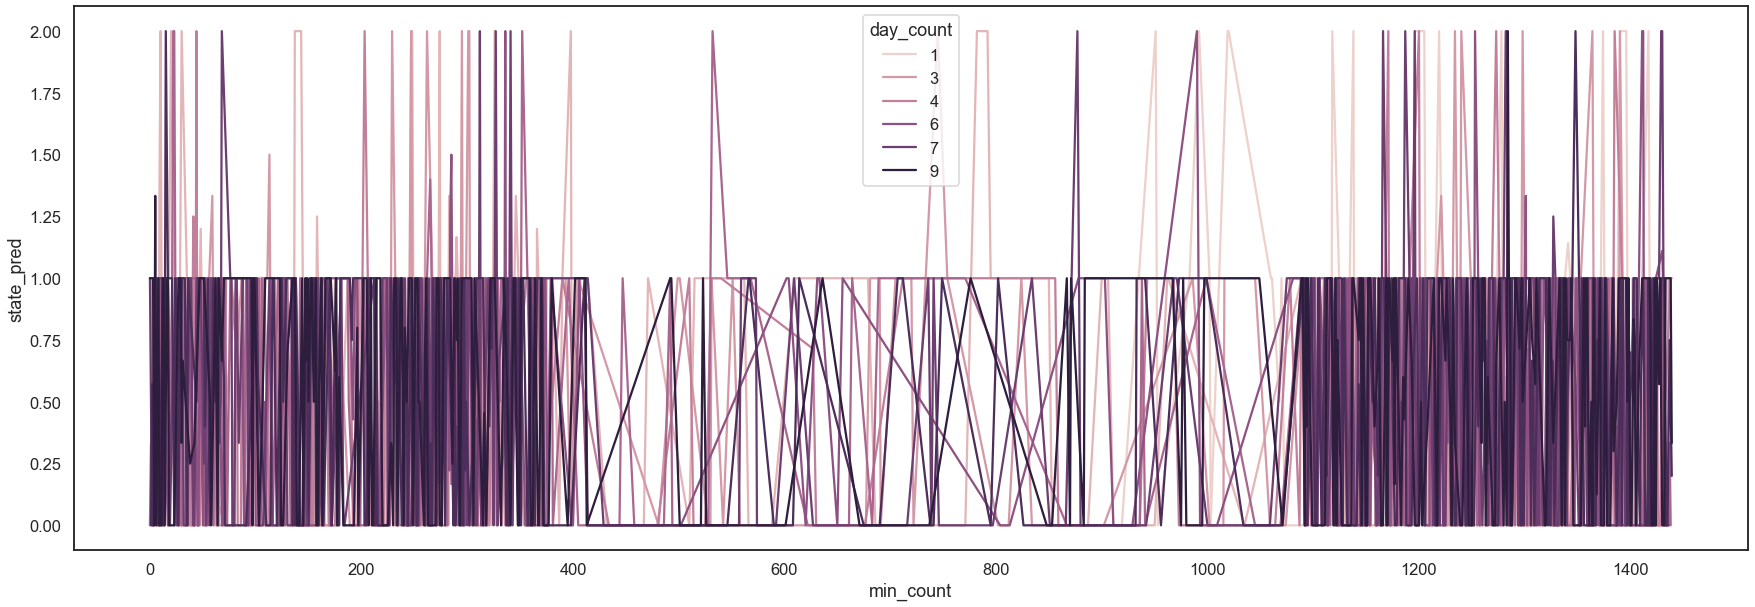

In [65]:
plt.figure(figsize=(30, 10))
sns.lineplot(x='min_count', y='state_pred', data=data[data['Housing']=='single'], ci=None, hue='day_count')

<Figure size 2160x720 with 0 Axes>

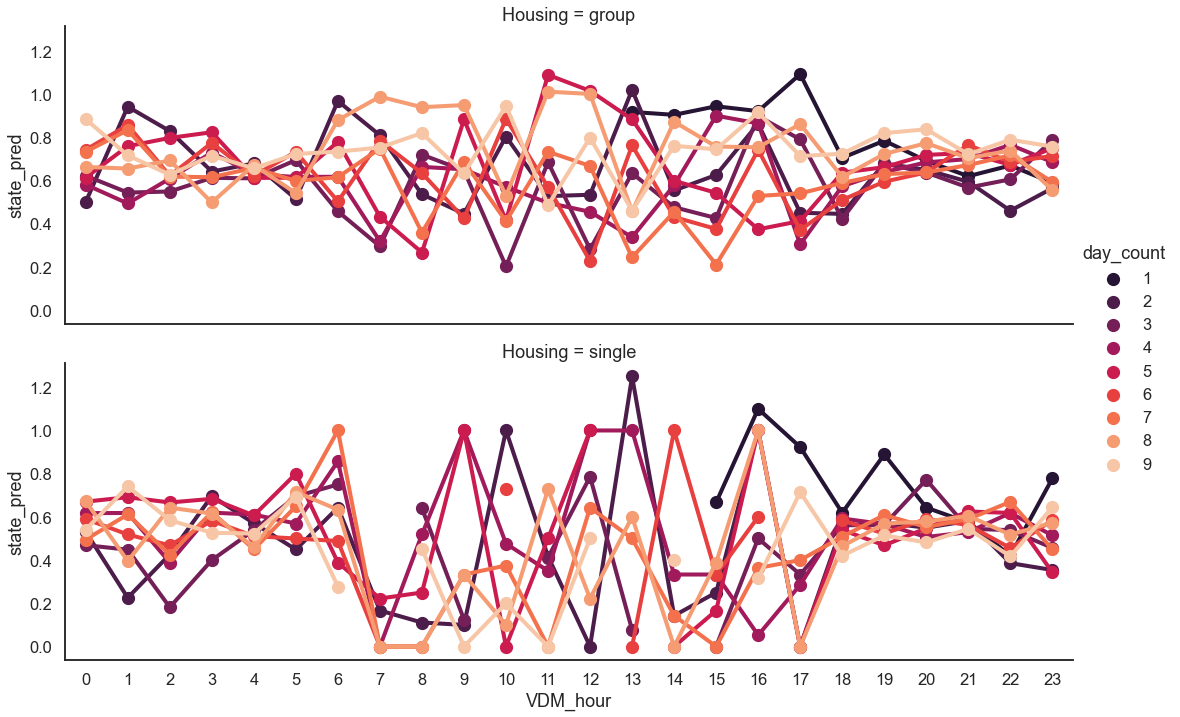

In [101]:
plt.figure(figsize=(30, 10))
sns.catplot(x='VDM_hour', y='state_pred', data=data, ci=None, kind='point', hue='day_count',
           height=5, aspect=3, palette='rocket',
           col='Housing', col_wrap=1)
plt.show()

041AC164CB


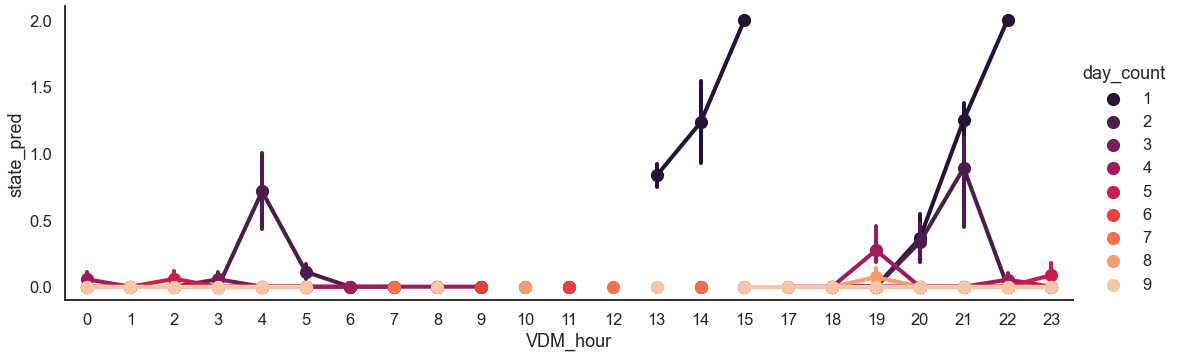

041AC1635B


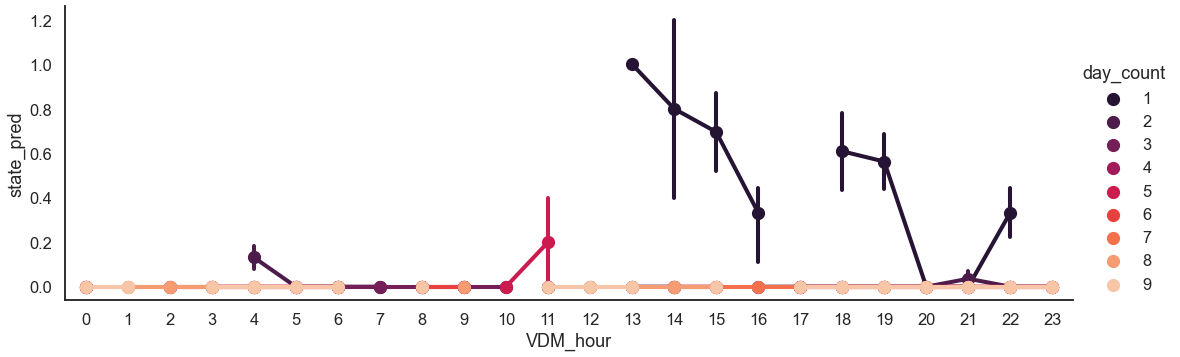

041AC15DF7


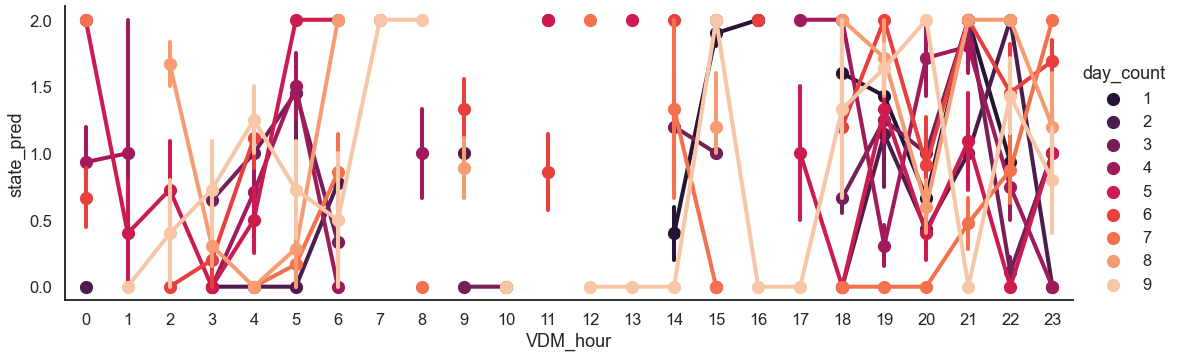

041AC1617F


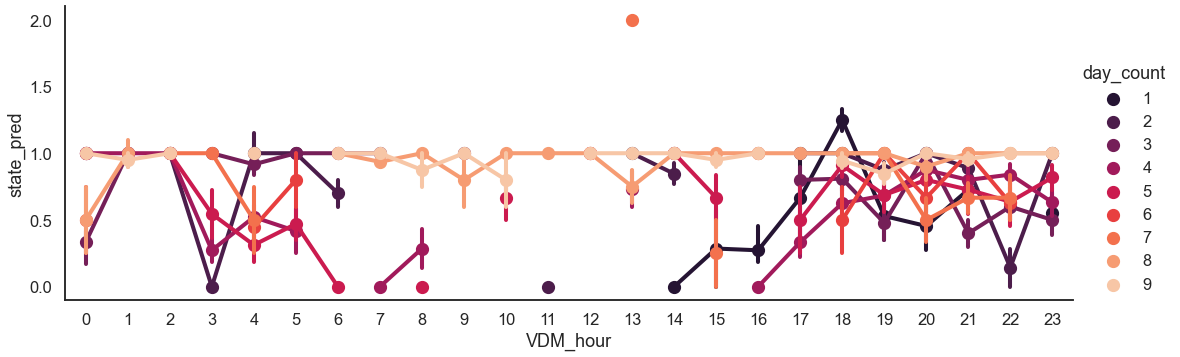

041AC1677D


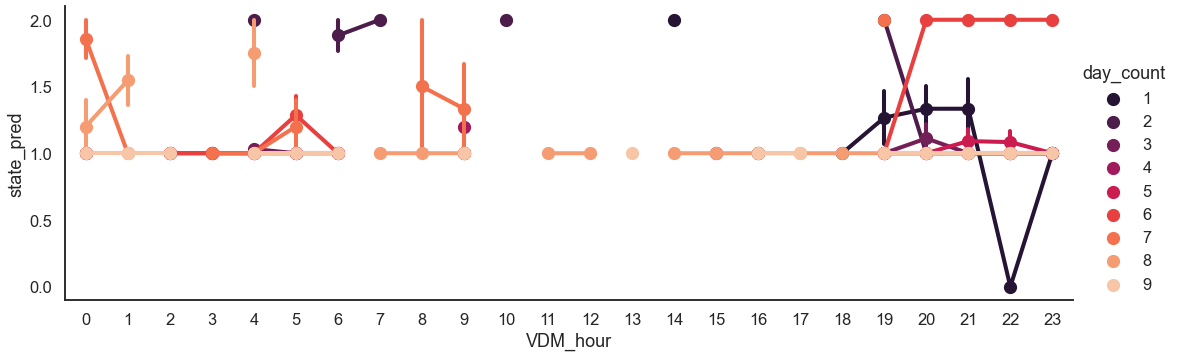

041AC169DC


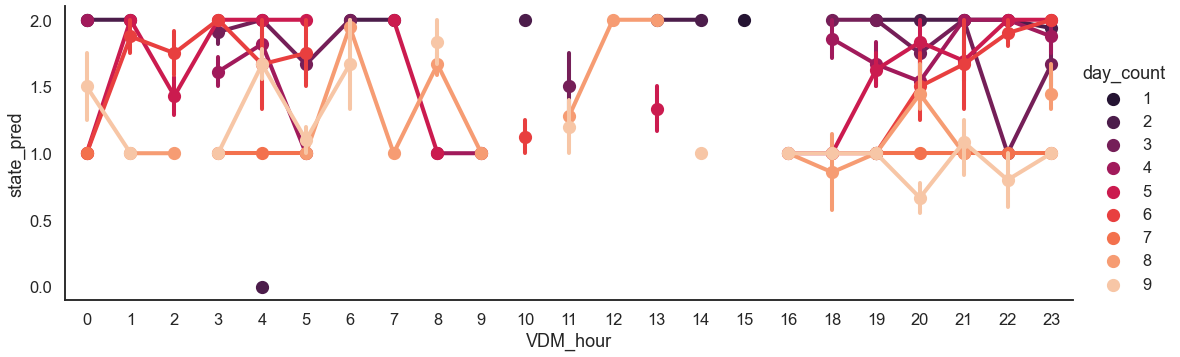

041AC1646F


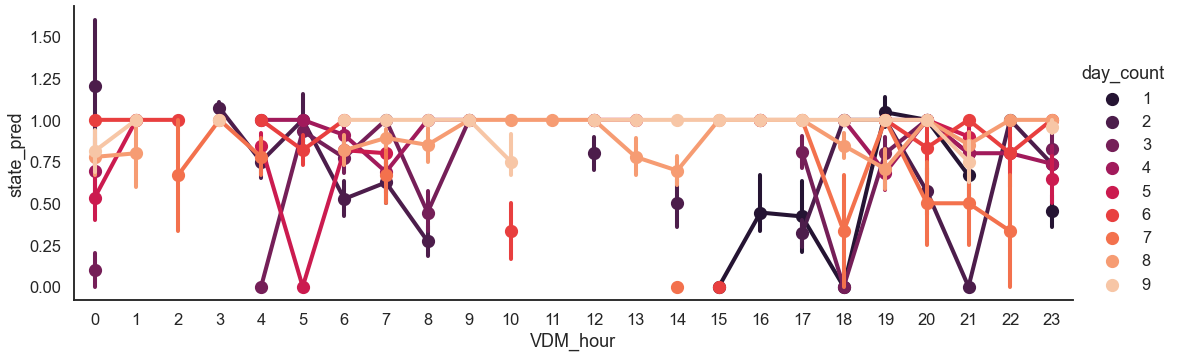

041AC16188


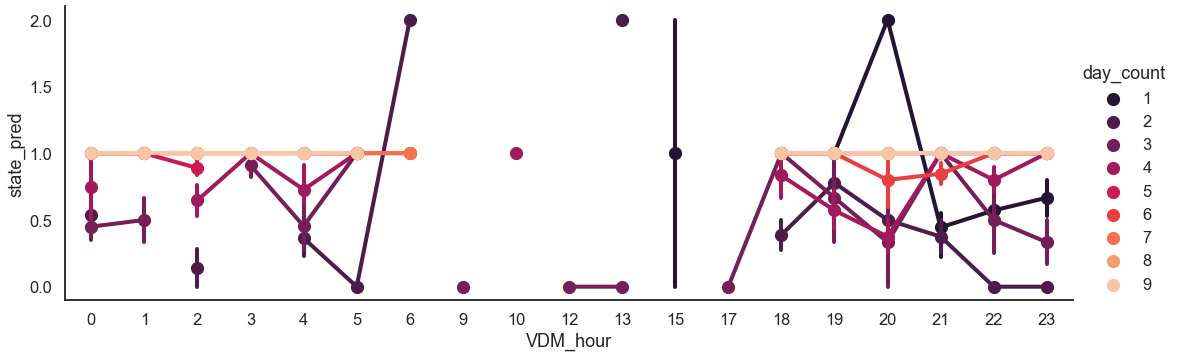

041AC15ED3


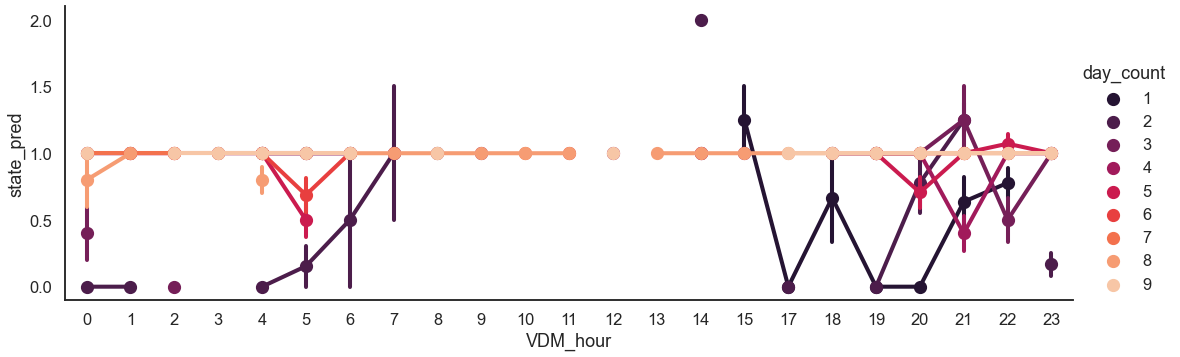

041AC15FD5


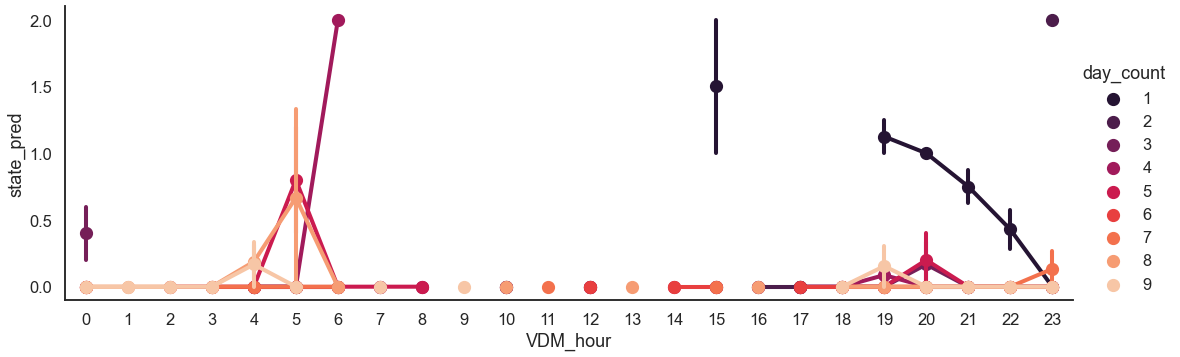

041AC16782


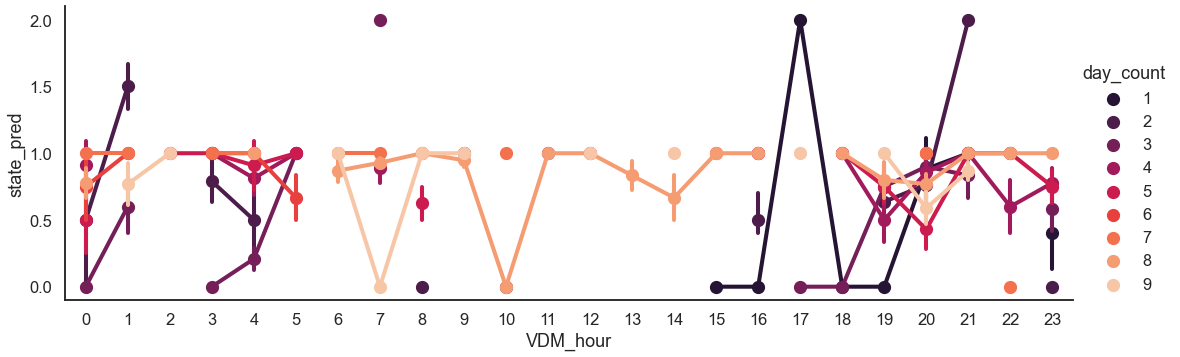

041AC16486


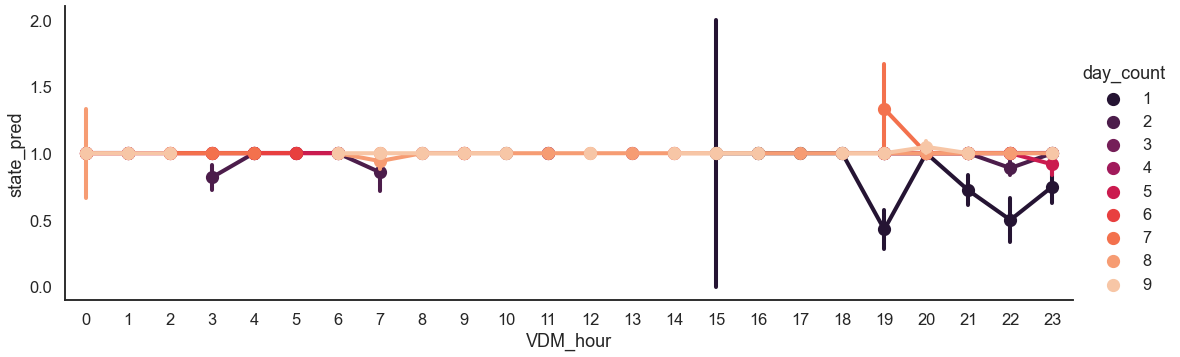

041AC163D0


KeyboardInterrupt: 

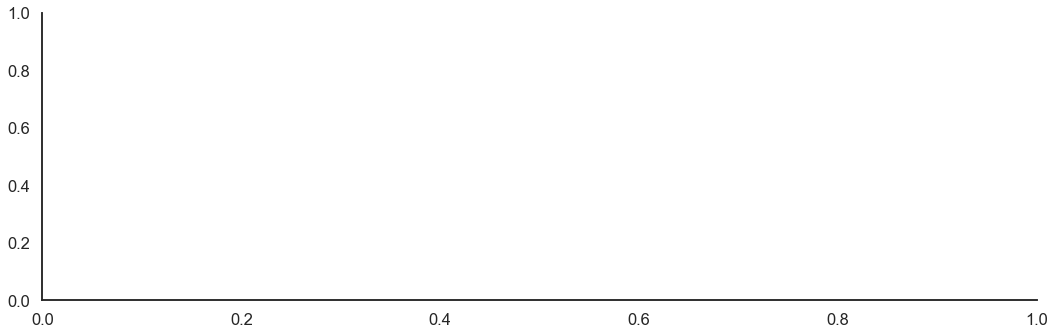

In [93]:
for Id in data['IdRFID'].unique():
    print(Id)
    data_int = data[data['IdRFID']==Id]
    sns.catplot(x='VDM_hour', y='state_pred', data=data_int, ci=68, kind='point', hue='day_count',
           height=5, aspect=3, palette='rocket')
    plt.show()
    